In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


# This project aims to recognize german traffic signs with CNN deep learning model.

# Dataset have 43 different classes and will classify traffic signs with 43 classes.

<div style="text-align: center">
    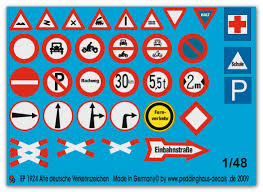
</div>
    

## Import libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from PIL import Image
import cv2
plt.style.use('ggplot')




import os

import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Dense, Flatten, InputLayer, Reshape, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

2024-04-20 11:36:57.762876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-20 11:36:57.763033: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-20 11:36:57.948966: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


## EDA

In [3]:
test=pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Test.csv")
train=pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Train.csv")
meta=pd.read_csv("/kaggle/input/gtsrb-german-traffic-sign/Meta.csv")

In [3]:
test

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0         53      54       6       5      48      49       16  Test/00000.png
1         42      45       5       5      36      40        1  Test/00001.png
2         48      52       6       6      43      47       38  Test/00002.png
3         27      29       5       5      22      24       33  Test/00003.png
4         60      57       5       5      55      52       11  Test/00004.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12625     42      41       5       6      37      36       12  Test/12625.png
12626     50      51       6       5      45      46       33  Test/12626.png
12627     29      29       6       6      24      24        6  Test/12627.png
12628     48      49       5       6      43      44        7  Test/12628.png
12629     32      31       6       5      27      26       10  Test/12629.png

[12630 rows x 8 columns]

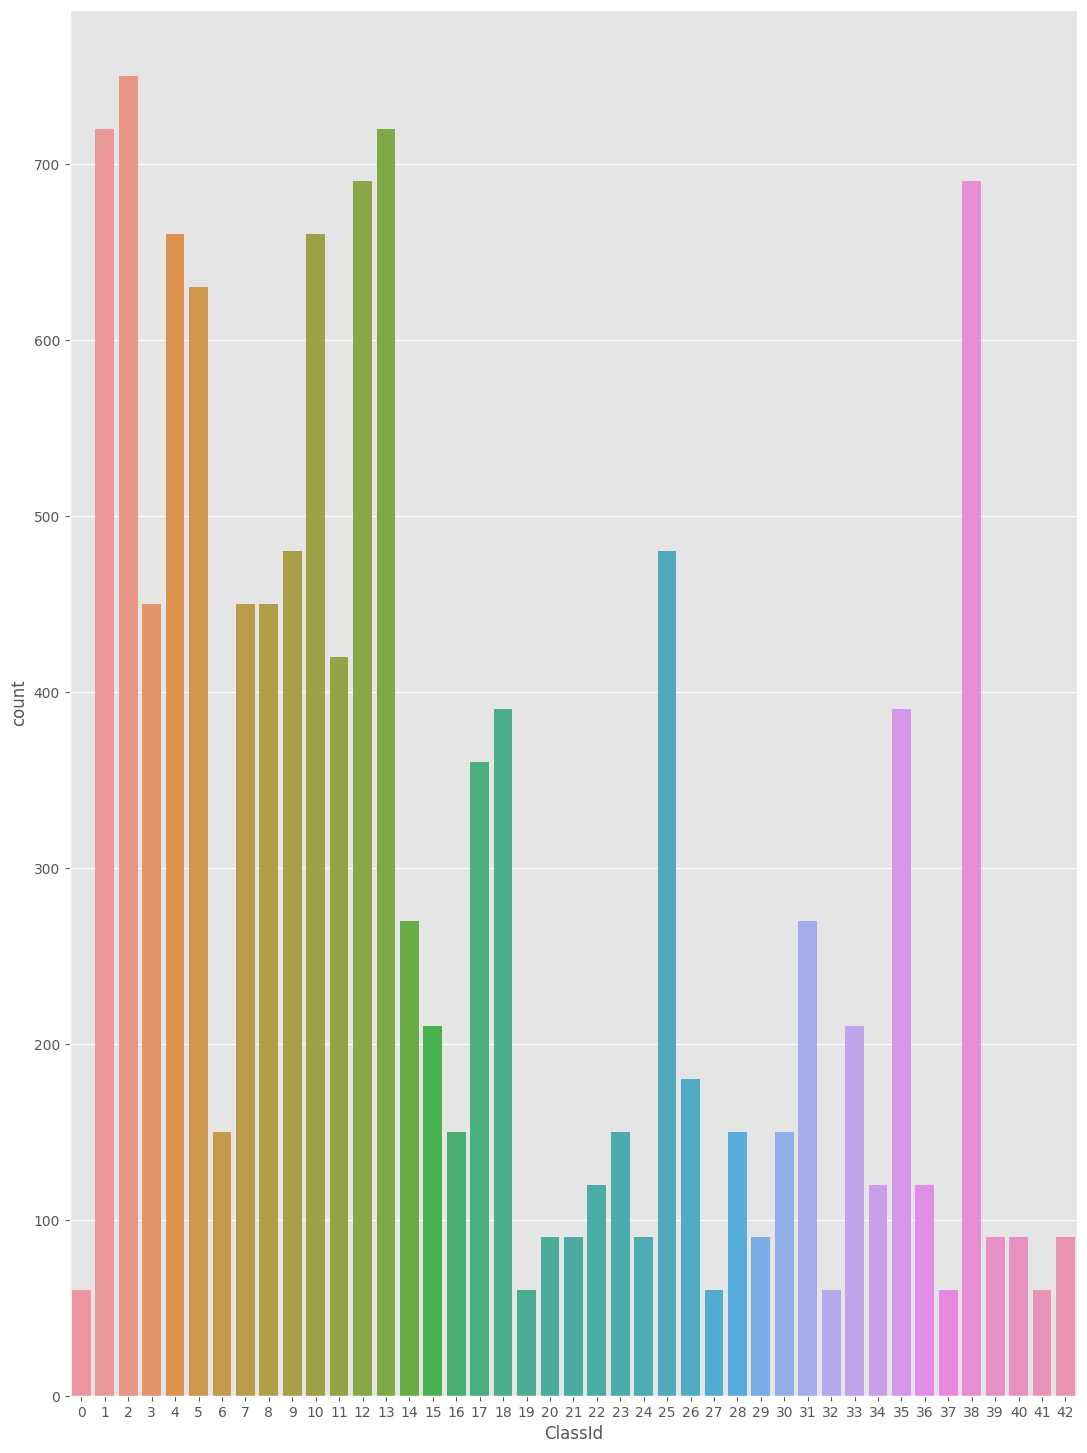

In [4]:
plt.figure(figsize = (13, 18))
sns.countplot(x = test["ClassId"]);

In [5]:
train

Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId  \
0         27      26       5       5      22      20       20   
1         28      27       5       6      23      22       20   
2         29      26       6       5      24      21       20   
3         28      27       5       6      23      22       20   
4         28      26       5       5      23      21       20   
...      ...     ...     ...     ...     ...     ...      ...   
39204     52      56       5       6      47      51       42   
39205     56      58       5       5      51      53       42   
39206     58      62       5       6      53      57       42   
39207     63      69       5       7      58      63       42   
39208     68      69       7       6      62      63       42   

                                 Path  
0      Train/20/00020_00000_00000.png  
1      Train/20/00020_00000_00001.png  
2      Train/20/00020_00000_00002.png  
3      Train/20/00020_00000_00003.png  
4      Train/20/00020_00000_00004.png  
...                               ...  
39204  Train/42/00042_00007_00025.png  
39205  Train/42/00042_00007_00026.png  
39206  Train/42/00042_00007_00027.png  
39207  Train/42/00042_00007_00028.png  
39208  Train/42/00042_00007_00029.png  

[39209 rows x 8 columns]

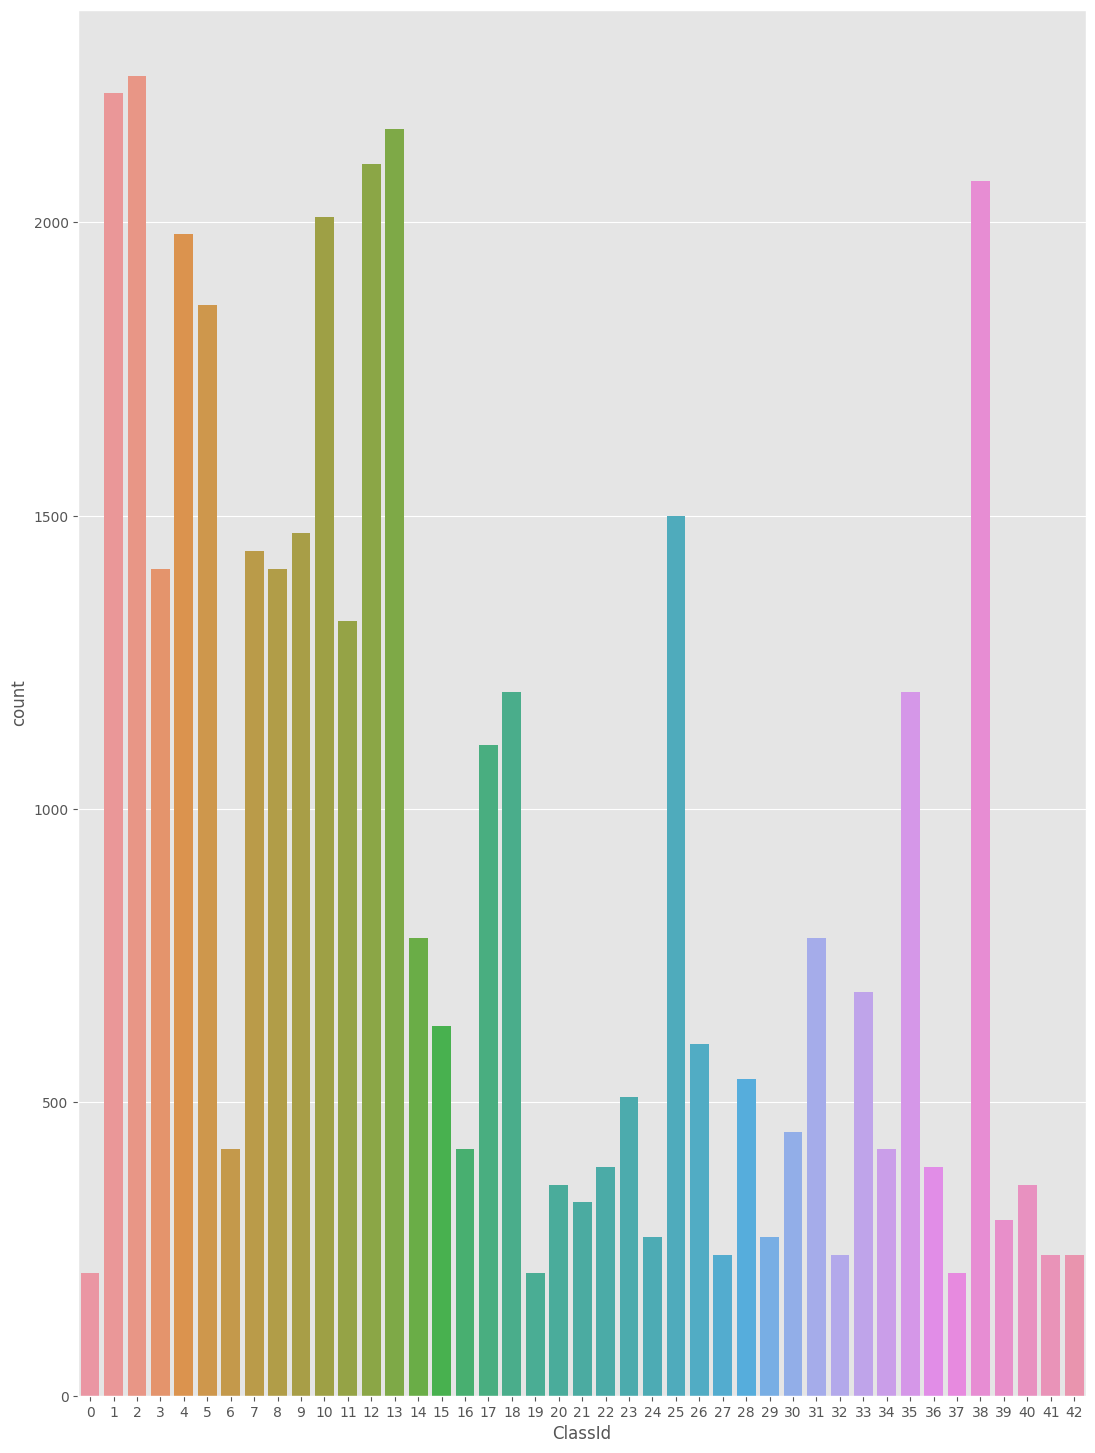

In [6]:
plt.figure(figsize = (13, 18))
sns.countplot(x = train["ClassId"]);

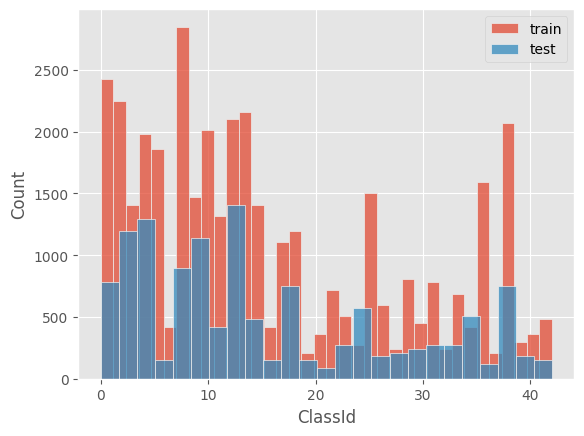

In [7]:
sns.histplot(x=train["ClassId"], label="train")
sns.histplot(x=test["ClassId"], label="test")
plt.legend();

In [8]:
meta

Path  ClassId  ShapeId  ColorId SignId
0   Meta/27.png       27        0        0   1.32
1    Meta/0.png        0        1        0   3.29
2    Meta/1.png        1        1        0   3.29
3   Meta/10.png       10        1        0   3.27
4   Meta/11.png       11        0        0   1.22
5   Meta/12.png       12        2        2    2.3
6   Meta/13.png       13        4        0    2.1
7   Meta/14.png       14        3        0    2.2
8   Meta/15.png       15        1        0    3.1
9   Meta/16.png       16        1        0    3.3
10  Meta/17.png       17        1        0   3.21
11  Meta/18.png       18        0        0   1.39
12  Meta/19.png       19        0        0    1.2
13   Meta/2.png        2        1        0   3.29
14  Meta/20.png       20        0        0    1.1
15  Meta/21.png       21        0        0  1.3.2
16  Meta/22.png       22        0        0    1.1
17  Meta/23.png       23        0        0   1.13
18  Meta/24.png       24        0        0  1.5.2
19  Meta/25.png       25        0        0   1.37
20  Meta/26.png       26        0        0   1.24
21  Meta/28.png       28        0        0   1.33
22  Meta/29.png       29        0        0   1.34
23   Meta/3.png        3        1        0   3.29
24  Meta/30.png       30        0        0    NaN
25  Meta/31.png       31        0        0   1.36
26  Meta/32.png       32        1        3   3.42
27  Meta/33.png       33        1        1    4.2
28  Meta/34.png       34        1        1    4.3
29  Meta/35.png       35        1        1    4.1
30  Meta/36.png       36        1        1    4.4
31  Meta/37.png       37        1        1    4.5
32  Meta/38.png       38        1        1    4.7
33  Meta/39.png       39        1        1    4.8
34   Meta/4.png        4        1        0   3.29
35  Meta/40.png       40        1        1    4.1
36  Meta/41.png       41        1        3   3.26
37  Meta/42.png       42        1        3   3.28
38   Meta/5.png        5        1        0   3.29
39   Meta/6.png        6        1        3    3.3
40   Meta/7.png        7        1        0   3.29
41   Meta/8.png        8        1        0   3.29
42   Meta/9.png        9        1        0   3.25

In [4]:
train_labels = train[["ClassId"]]
train_labels

ClassId
0           20
1           20
2           20
3           20
4           20
...        ...
39204       42
39205       42
39206       42
39207       42
39208       42

[39209 rows x 1 columns]

In [5]:
test_labels = test[["ClassId"]]
test_labels

ClassId
0           16
1            1
2           38
3           33
4           11
...        ...
12625       12
12626       33
12627        6
12628        7
12629       10

[12630 rows x 1 columns]

In [6]:
test_images = "/kaggle/input/gtsrb-german-traffic-sign/"+test["Path"]
test_images

0        /kaggle/input/gtsrb-german-traffic-sign/Test/0...
1        /kaggle/input/gtsrb-german-traffic-sign/Test/0...
2        /kaggle/input/gtsrb-german-traffic-sign/Test/0...
3        /kaggle/input/gtsrb-german-traffic-sign/Test/0...
4        /kaggle/input/gtsrb-german-traffic-sign/Test/0...
                               ...                        
12625    /kaggle/input/gtsrb-german-traffic-sign/Test/1...
12626    /kaggle/input/gtsrb-german-traffic-sign/Test/1...
12627    /kaggle/input/gtsrb-german-traffic-sign/Test/1...
12628    /kaggle/input/gtsrb-german-traffic-sign/Test/1...
12629    /kaggle/input/gtsrb-german-traffic-sign/Test/1...
Name: Path, Length: 12630, dtype: object

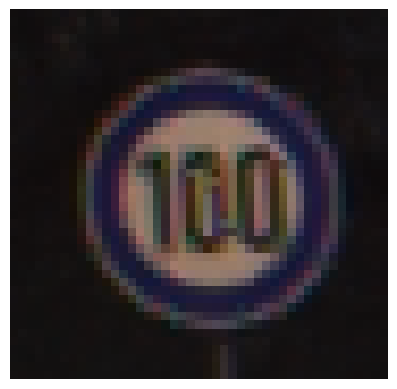

In [12]:
img = cv2.imread(test_images[11])
plt.imshow(img)
plt.axis("off");

In [7]:
train_images = "/kaggle/input/gtsrb-german-traffic-sign/"+train["Path"]
train_images

0        /kaggle/input/gtsrb-german-traffic-sign/Train/...
1        /kaggle/input/gtsrb-german-traffic-sign/Train/...
2        /kaggle/input/gtsrb-german-traffic-sign/Train/...
3        /kaggle/input/gtsrb-german-traffic-sign/Train/...
4        /kaggle/input/gtsrb-german-traffic-sign/Train/...
                               ...                        
39204    /kaggle/input/gtsrb-german-traffic-sign/Train/...
39205    /kaggle/input/gtsrb-german-traffic-sign/Train/...
39206    /kaggle/input/gtsrb-german-traffic-sign/Train/...
39207    /kaggle/input/gtsrb-german-traffic-sign/Train/...
39208    /kaggle/input/gtsrb-german-traffic-sign/Train/...
Name: Path, Length: 39209, dtype: object

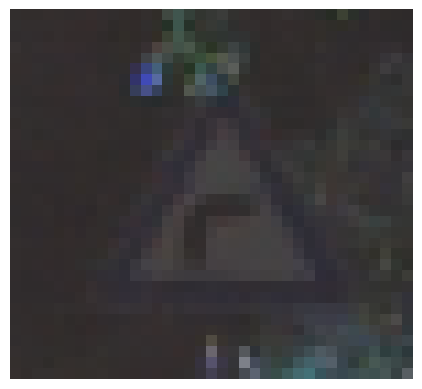

In [14]:
img_train = cv2.imread(train_images[11])
plt.imshow(img_train)
plt.axis("off");

In [8]:
meta_images = "/kaggle/input/gtsrb-german-traffic-sign/"+meta["Path"]
meta_images

0     /kaggle/input/gtsrb-german-traffic-sign/Meta/2...
1     /kaggle/input/gtsrb-german-traffic-sign/Meta/0...
2     /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
3     /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
4     /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
5     /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
6     /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
7     /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
8     /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
9     /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
10    /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
11    /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
12    /kaggle/input/gtsrb-german-traffic-sign/Meta/1...
13    /kaggle/input/gtsrb-german-traffic-sign/Meta/2...
14    /kaggle/input/gtsrb-german-traffic-sign/Meta/2...
15    /kaggle/input/gtsrb-german-traffic-sign/Meta/2...
16    /kaggle/input/gtsrb-german-traffic-sign/Meta/2...
17    /kaggle/input/gtsrb-german-traffic-sign/Me

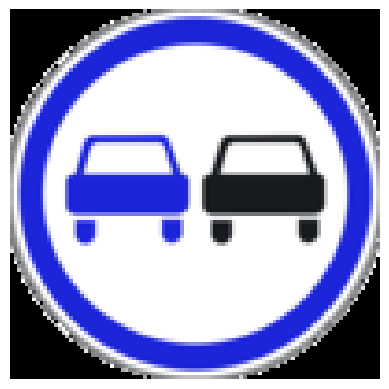

In [16]:
img_meta = cv2.imread(meta_images[42])
plt.imshow(img_meta)
plt.axis("off");

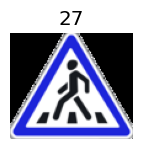

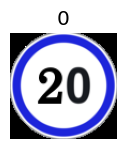

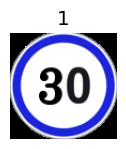

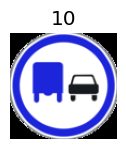

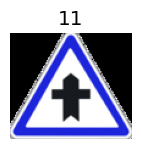

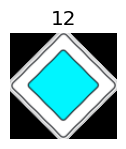

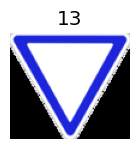

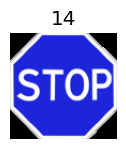

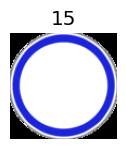

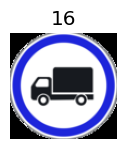

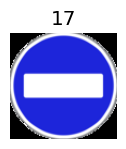

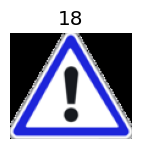

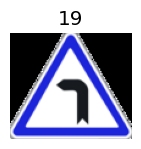

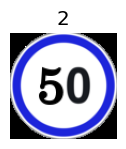

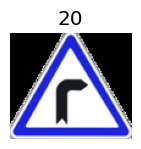

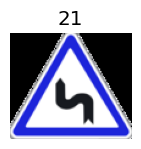

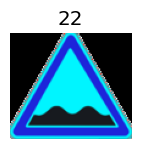

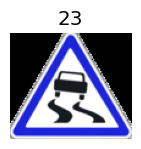

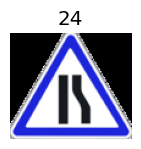

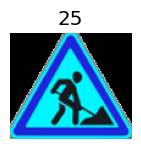

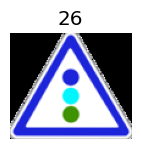

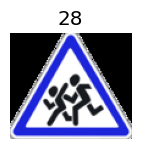

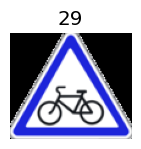

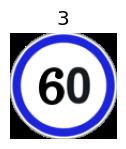

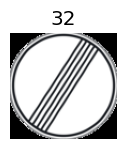

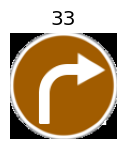

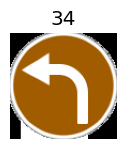

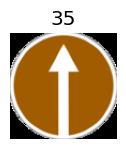

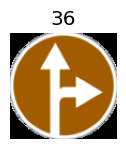

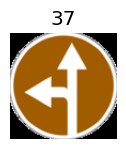

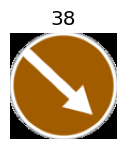

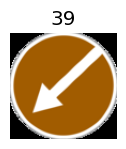

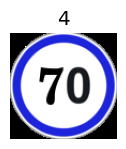

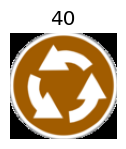

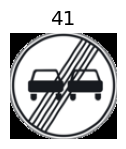

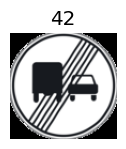

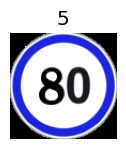

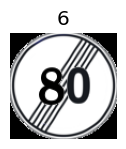

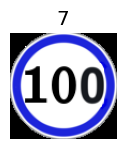

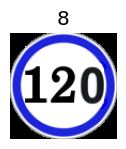

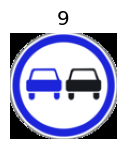

In [ ]:
num_sign = 43
num_col = 6
num_row = num_sign//num_col + 1
for i in range(43):
    plt.figure(figsize=(13,13))
    plt.subplot(num_row, num_col, i+1)
    img = cv2.imread(meta_images[i])
    plt.title(meta["ClassId"][i])
    plt.imshow(img)
    plt.axis("off");

## Data Preprocessing

In [9]:

df_train = pd.merge(train_images, train_labels, left_index=True, right_index=True)
df_train.columns = ["images", "labels"]
df_train

images  labels
0      /kaggle/input/gtsrb-german-traffic-sign/Train/...      20
1      /kaggle/input/gtsrb-german-traffic-sign/Train/...      20
2      /kaggle/input/gtsrb-german-traffic-sign/Train/...      20
3      /kaggle/input/gtsrb-german-traffic-sign/Train/...      20
4      /kaggle/input/gtsrb-german-traffic-sign/Train/...      20
...                                                  ...     ...
39204  /kaggle/input/gtsrb-german-traffic-sign/Train/...      42
39205  /kaggle/input/gtsrb-german-traffic-sign/Train/...      42
39206  /kaggle/input/gtsrb-german-traffic-sign/Train/...      42
39207  /kaggle/input/gtsrb-german-traffic-sign/Train/...      42
39208  /kaggle/input/gtsrb-german-traffic-sign/Train/...      42

[39209 rows x 2 columns]

In [10]:
df_test = pd.merge(test_images, test_labels, left_index=True, right_index=True)
df_test.columns = ["images", "labels"]
df_test

images  labels
0      /kaggle/input/gtsrb-german-traffic-sign/Test/0...      16
1      /kaggle/input/gtsrb-german-traffic-sign/Test/0...       1
2      /kaggle/input/gtsrb-german-traffic-sign/Test/0...      38
3      /kaggle/input/gtsrb-german-traffic-sign/Test/0...      33
4      /kaggle/input/gtsrb-german-traffic-sign/Test/0...      11
...                                                  ...     ...
12625  /kaggle/input/gtsrb-german-traffic-sign/Test/1...      12
12626  /kaggle/input/gtsrb-german-traffic-sign/Test/1...      33
12627  /kaggle/input/gtsrb-german-traffic-sign/Test/1...       6
12628  /kaggle/input/gtsrb-german-traffic-sign/Test/1...       7
12629  /kaggle/input/gtsrb-german-traffic-sign/Test/1...      10

[12630 rows x 2 columns]

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   images  39209 non-null  object
 1   labels  39209 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 612.8+ KB


In [12]:
X = []
for img in df_train["images"]:
    img = cv2.imread(img)
    img = cv2.resize(img, (30, 30))
    img = img/255.0
    X.append(img)

In [13]:
X = np.array(X)

In [15]:
y = df_train["labels"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)  # Number of samples should match y_train
print(y_train.shape)
print(X_test.shape)   # Number of samples should match y_test
print(y_test.shape)


(31367, 30, 30, 3)
(31367,)
(7842, 30, 30, 3)
(7842,)


## Modelling

In [18]:
model = Sequential() 

model.add(InputLayer(input_shape=(30,30,3))) 

model.add(Conv2D(filters=16, kernel_size=(3,3),activation="relu")) 
model.add(Conv2D(filters=32, kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) #taking the maximum value over a 2x2 pooling window.
model.add(Dropout(.20))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation="relu")) 
model.add(Conv2D(filters=128, kernel_size=(3,3),activation="relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(.20))

#converts the 2D matrix data to a vector
model.add(Flatten())  

#normalizes the activations of the previous layer at each batch, accelerates training and can lead to faster convergence.
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(43, activation="softmax"))

#Crossentropy is suitable for multi-class classification tasks where the labels are integers.

model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy", 
              metrics=["accuracy"]) 

In [19]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 63s 61ms/step - accuracy: 0.7548 - loss: 0.9805 - val_accuracy: 0.9901 - val_loss: 0.0429
Epoch 2/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.9783 - loss: 0.0702 - val_accuracy: 0.9912 - val_loss: 0.0350
Epoch 3/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 84s 62ms/step - accuracy: 0.9882 - loss: 0.0371 - val_accuracy: 0.9938 - val_loss: 0.0219
Epoch 4/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 58s 59ms/step - accuracy: 0.9876 - loss: 0.0389 - val_accuracy: 0.9908 - val_loss: 0.0286
Epoch 5/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 83s 61ms/step - accuracy: 0.9910 - loss: 0.0293 - val_accuracy: 0.9861 - val_loss: 0.0575
Epoch 6/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9911 - loss: 0.0282 - val_accuracy: 0.9971 - val_loss: 0.0124
Epoch 7/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9943 - loss: 0.0190 - val_accuracy: 0.9944 - val_loss: 0.0204
Epoch 8/15
981/981 ━━━━━━━━━━━━━━━━━━━━ 58s 60ms/step - accuracy: 0.9943 - loss: 0.0175 - 

In [20]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss:.3f},\nAccuracy: {accuracy*100:.2f}%")

246/246 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.9979 - loss: 0.0100
Loss: 0.013,
Accuracy: 99.74%


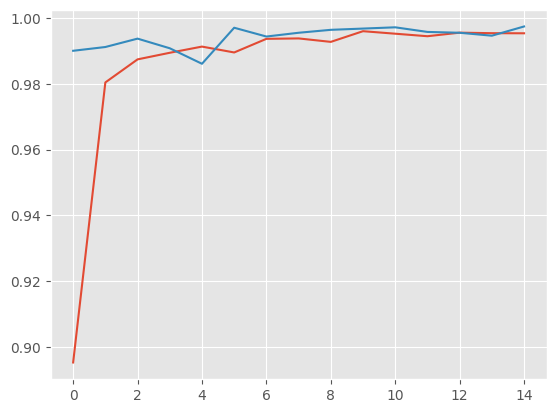

In [21]:
plt.plot(history.history["accuracy"], label="ACCURACY")
plt.plot(history.history["val_accuracy"], label="VAL_ACCURACY");

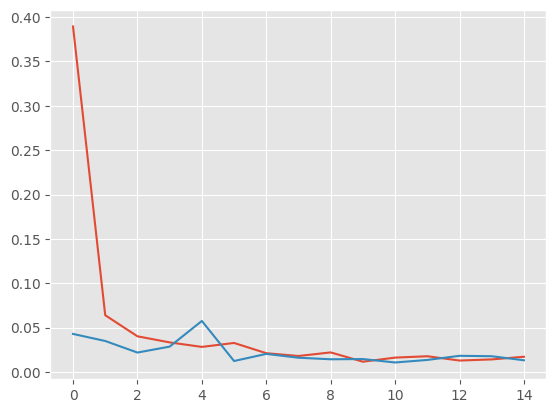

In [22]:
plt.plot(history.history["loss"], label="LOSS")
plt.plot(history.history["val_loss"], label="VAL_LOSS");

In [23]:
model.save("model_traffic_sign.h5")

In [ ]:
model = load_model("/kaggle/input/model-german-traffic-sign-recognition/model_traffic_sign.h5")

## Find Predictions

In [24]:
# identify test images
data_dir = "../input/gtsrb-german-traffic-sign"
img_width, img_height = 30, 30

# load test data
test = pd.read_csv(data_dir + '/Test.csv')
labels = test["ClassId"].values
imgs = test["Path"].values

data = []

# preparing test data
for img in imgs:
    image = cv2.imread(data_dir + '/' + img)
    image_fromarray = Image.fromarray(image, 'RGB')
    resize_image = image_fromarray.resize((img_width, img_height))
    data.append(np.array(resize_image))

# normalizing the data
X_test = np.array(data) / 255

# predicting test data
pred_probabilities = model.predict(X_test)
pred_classes = np.argmax(pred_probabilities, axis=-1)

# accuracy of test data
accuracy = accuracy_score(labels, pred_classes) * 100
print('Test Accuracy: ', accuracy)

# write actual and predicted classes 
for i in range(len(imgs[:5])):
    print("Görüntü", i+1)
    print("Gerçek Etiket:", labels[i])
    print("Tahmin Edilen Etiket:", pred_classes[i])

395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step
Test Accuracy:  97.9809976247031
Görüntü 1
Gerçek Etiket: 16
Tahmin Edilen Etiket: 16
Görüntü 2
Gerçek Etiket: 1
Tahmin Edilen Etiket: 1
Görüntü 3
Gerçek Etiket: 38
Tahmin Edilen Etiket: 38
Görüntü 4
Gerçek Etiket: 33
Tahmin Edilen Etiket: 33
Görüntü 5
Gerçek Etiket: 11
Tahmin Edilen Etiket: 11


## Visualize Predictions

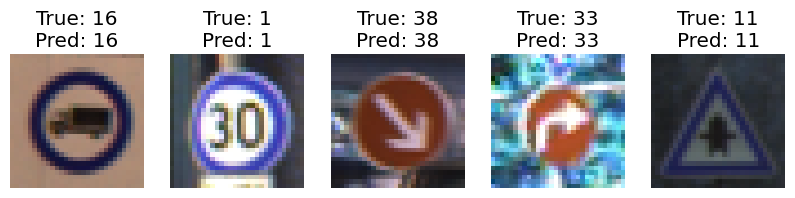

In [25]:
plt.figure(figsize=(10, 5))
for i in range(5):  # Display first 5 images and their labels
    plt.subplot(1, 5, i+1)
    plt.imshow(data[i])
    plt.title(f"True: {labels[i]}\nPred: {pred_classes[i]}")
    plt.axis('off')

plt.show()